In [1]:

# NOTICE:
# in anaconda command prompt, enter:
# jupyter notebook

import requests
import pandas as pd
from pandas import DataFrame
pd.set_option('display.max_columns', None)


In [2]:

url = 'https://www.federalreserve.gov/releases/h8/current/default.htm'
html = requests.get(url).content
df_list = pd.read_html(html)
df = df_list[10]


In [3]:

df = df.drop(df.columns[0], axis=1) #drop the first column 0,1,2 etc
df.columns = df.columns.droplevel(0) #remove the upper level of multi Index
df.rename(columns = {'Account.1':'Account'}, inplace = True) #Rename Columns
df = df.set_index('Account').transpose() #Transpose the data


In [4]:
# dynamic plots
#Plot
import plotly.graph_objects as go
import plotly.express as px
from plotly.offline import plot


fig = px.bar(df, x=df.index, height=400)
# plot(fig)

buttonlist = []
for label in df.columns.dropna():
    buttonlist.append(
        dict(
            args=['y',[df[label]]],
            label=label,
            method='restyle'
        )
    )

fig.update_layout(
    # Add dropdown
    updatemenus=[
        go.layout.Updatemenu(
            buttons=buttonlist,
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.1,
            xanchor="left",
            y=1.1,
            yanchor="top"
        ),
    ],
    autosize=True,
    yaxis={'title':'Value'},
)

#fig.show()
plot(fig)


'temp-plot.html'

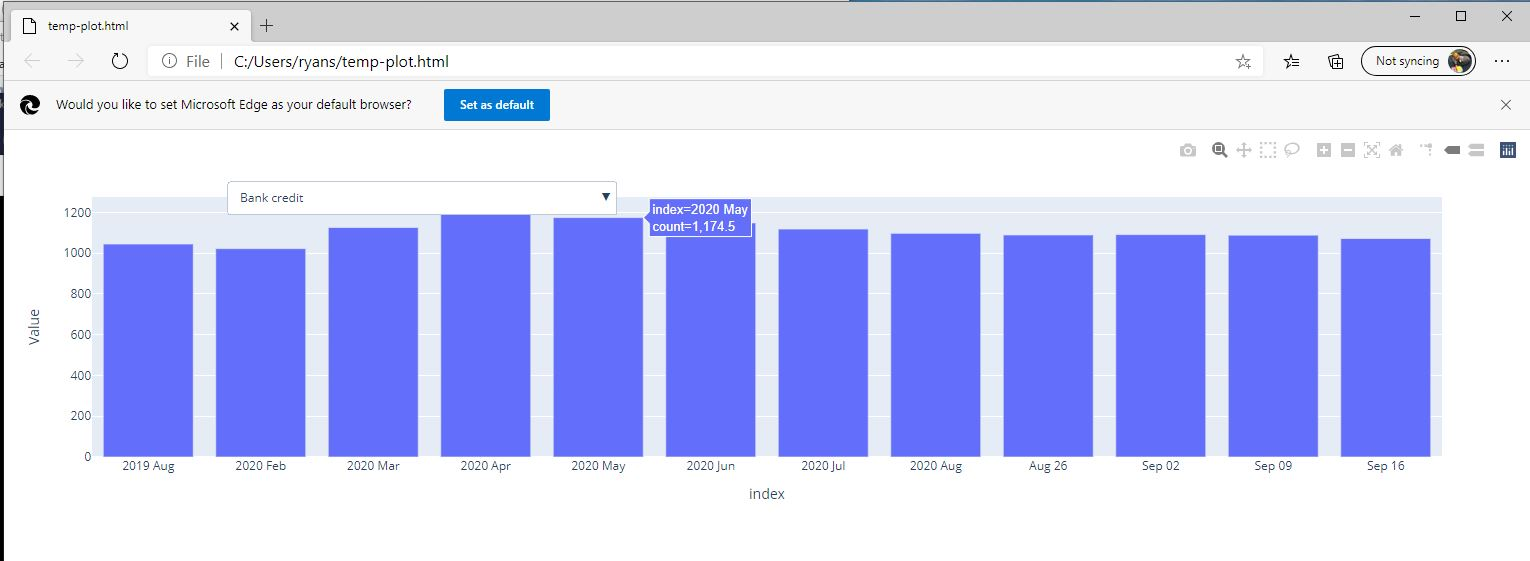

In [12]:

from IPython.display import Image
Image(filename='C:/Users/ryans/OneDrive/Desktop/1.jpg', width=1900)


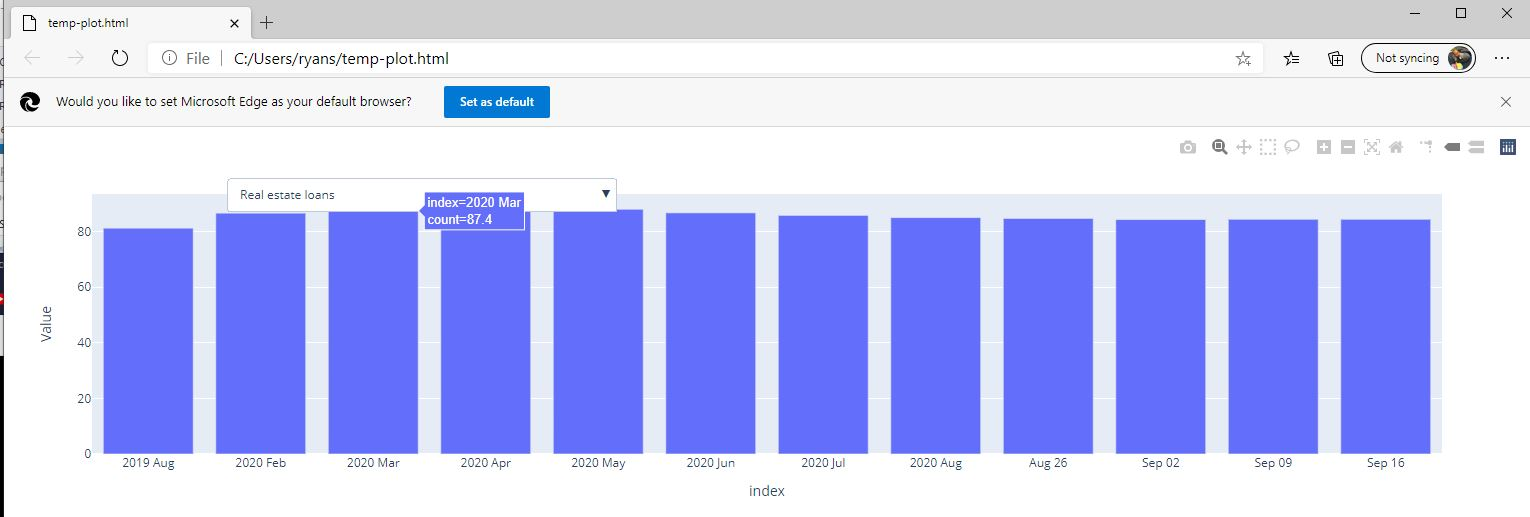

In [13]:

from IPython.display import Image
Image(filename='C:/Users/ryans/OneDrive/Desktop/2.jpg', width=1900)


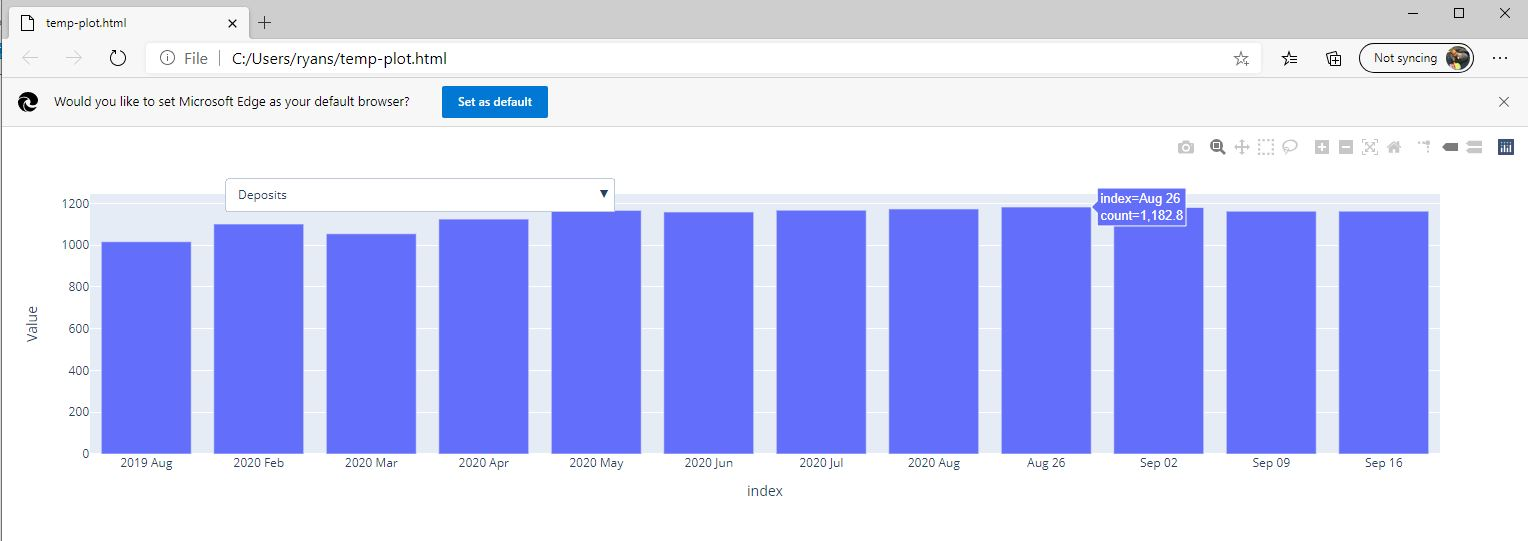

In [14]:

from IPython.display import Image
Image(filename='C:/Users/ryans/OneDrive/Desktop/3.jpg', width=1900)
